In [1]:
import math

import pandas as pd

import analysis
import distributions
from pacing import AdServer, Auction, Campaign, AsapPacing, CumulativeEqualPacing, RecomputedEqualPacing, LinkedInPacing
from simulation import Simulation

In [2]:
# general settings
num_campaigns = 50
impressions_target = 100_000

impressions = math.ceil(num_campaigns * impressions_target)

ticks = 24 * 60

base_dist = distributions.custom_dist(ticks)
# base_dist = distributions.uniform_dist(ticks)
traffic_dist = distributions.traffic_distribution(base_dist, impressions)

In [3]:
asap = [Campaign(i, i, AsapPacing(i * impressions_target)) for i in range(1, num_campaigns + 1)]
cumulative_equal = [Campaign(i, i, CumulativeEqualPacing(i * impressions_target, ticks)) for i in
                    range(1, num_campaigns + 1)]
recomputed_equal = [Campaign(i, i, RecomputedEqualPacing(i * impressions_target, ticks)) for i in
                    range(1, num_campaigns + 1)]
linkedin = [Campaign(i, i, LinkedInPacing(i * impressions_target, traffic_dist)) for i in range(1, num_campaigns + 1)]
linkedin_hot_end = [Campaign(i, i, LinkedInPacing(i * impressions_target,
                                                  distributions.traffic_distribution(base_dist, impressions_target),
                                                  2 * 60)) for i in range(1, num_campaigns + 1)]


def configure_and_run(campaigns, traffic_distribution, ticks):
    auction = Auction(campaigns)
    ad_server = AdServer(traffic_distribution, auction, campaigns)
    sim = Simulation(ticks, ad_server)
    return sim.run()

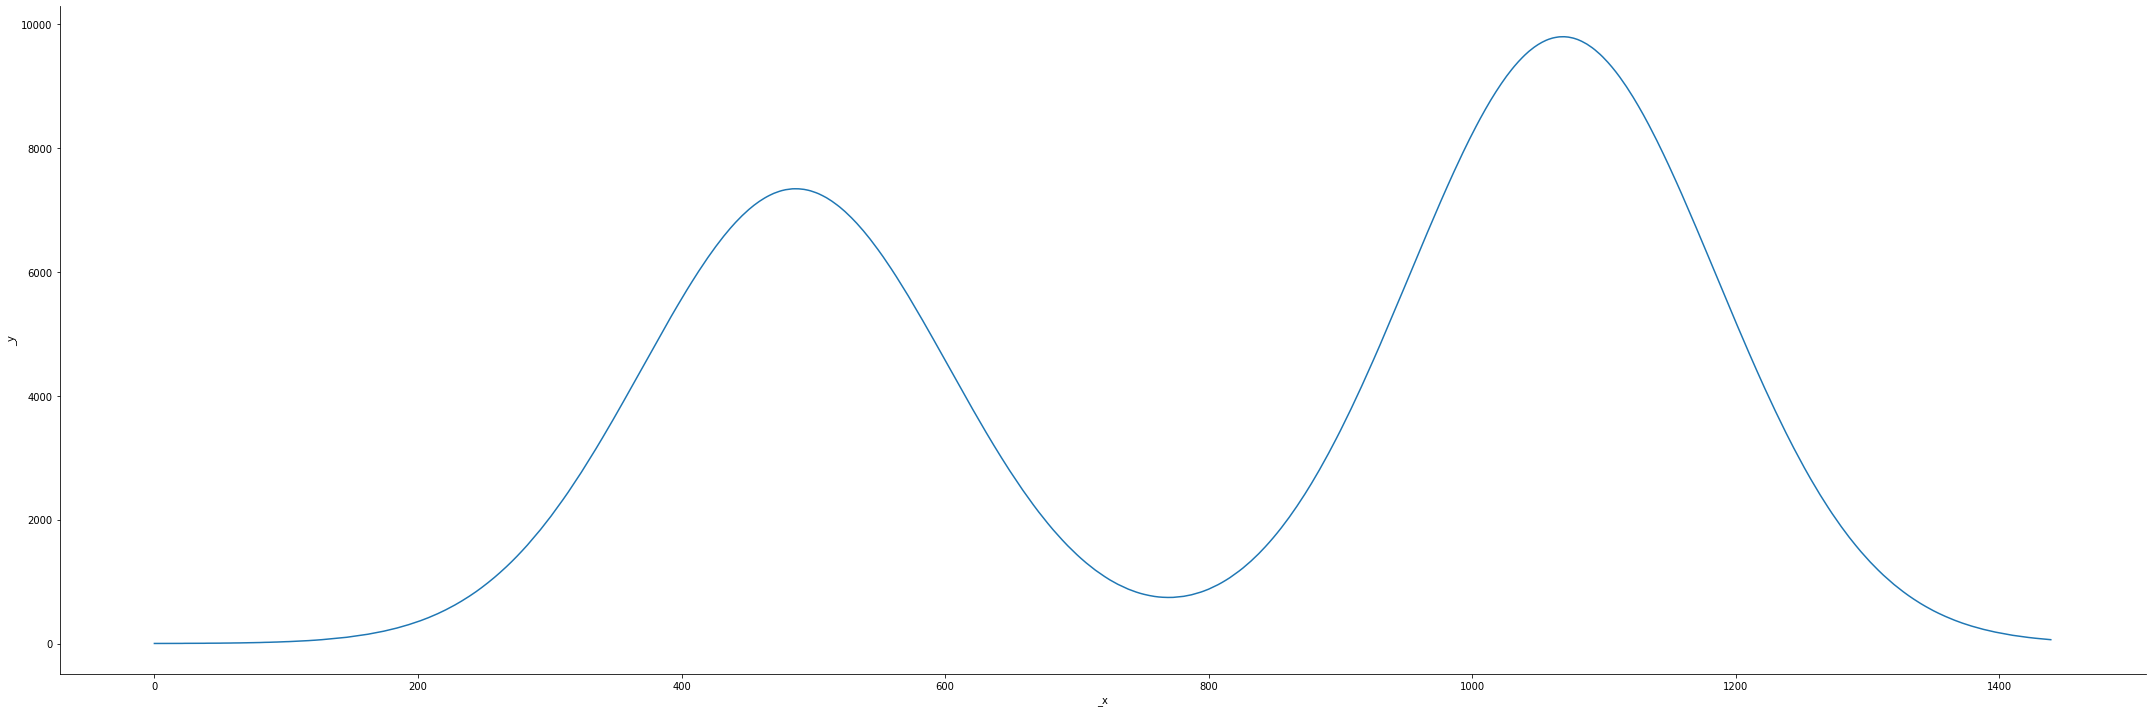

In [4]:
analysis.line_plot(traffic_dist)

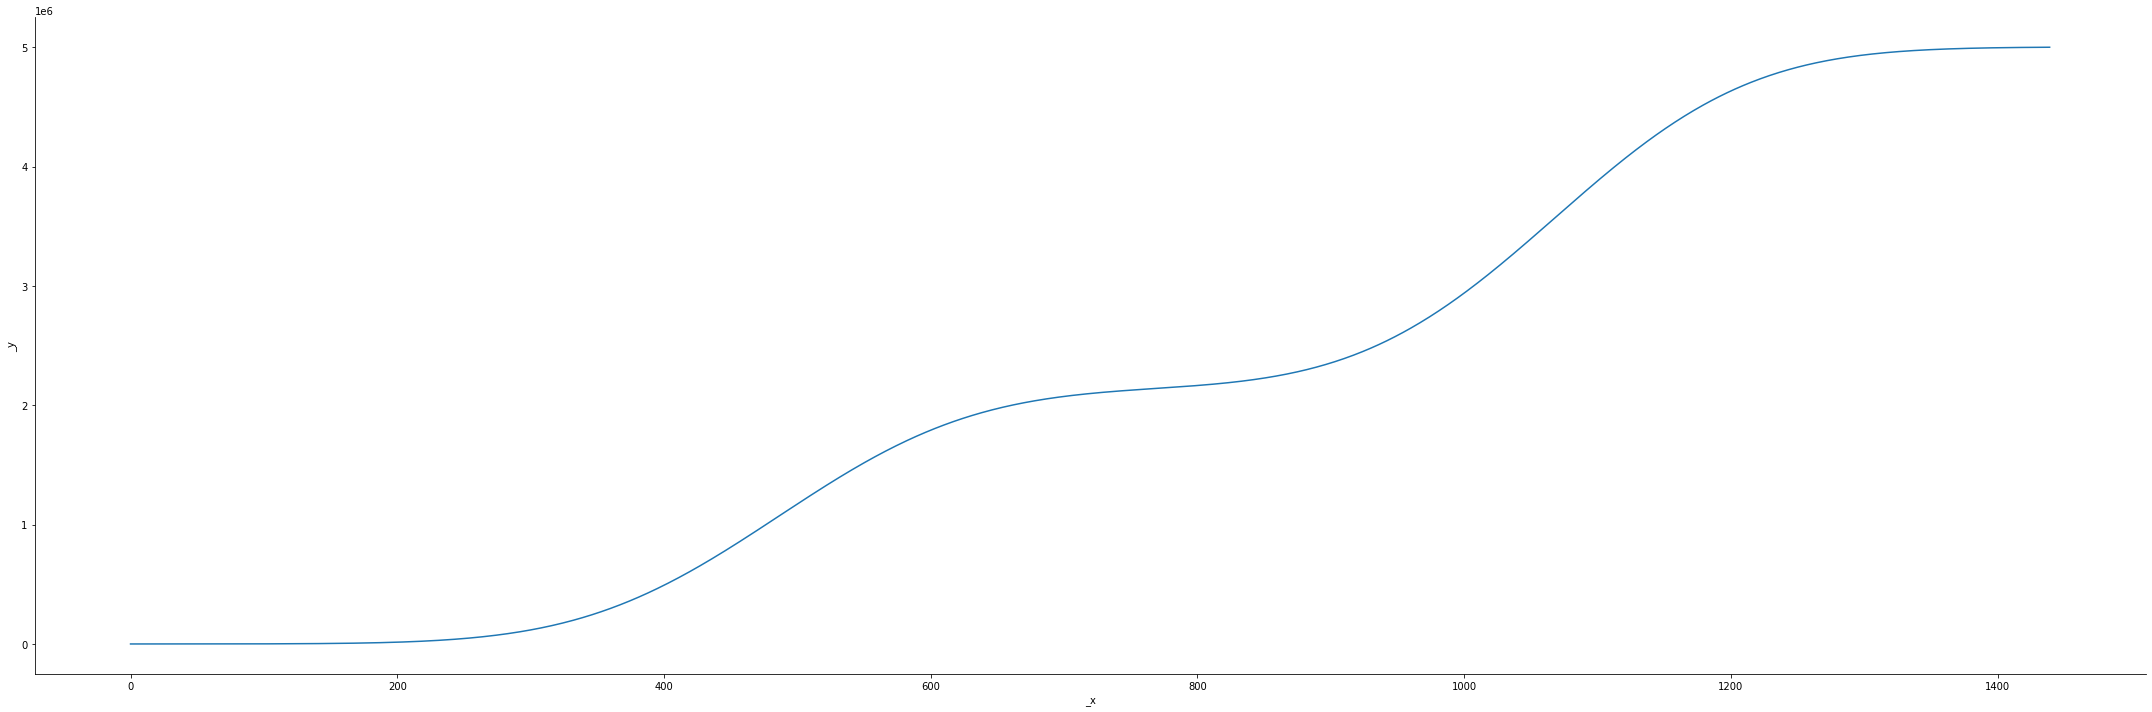

In [5]:
analysis.line_plot(traffic_dist.cumsum())

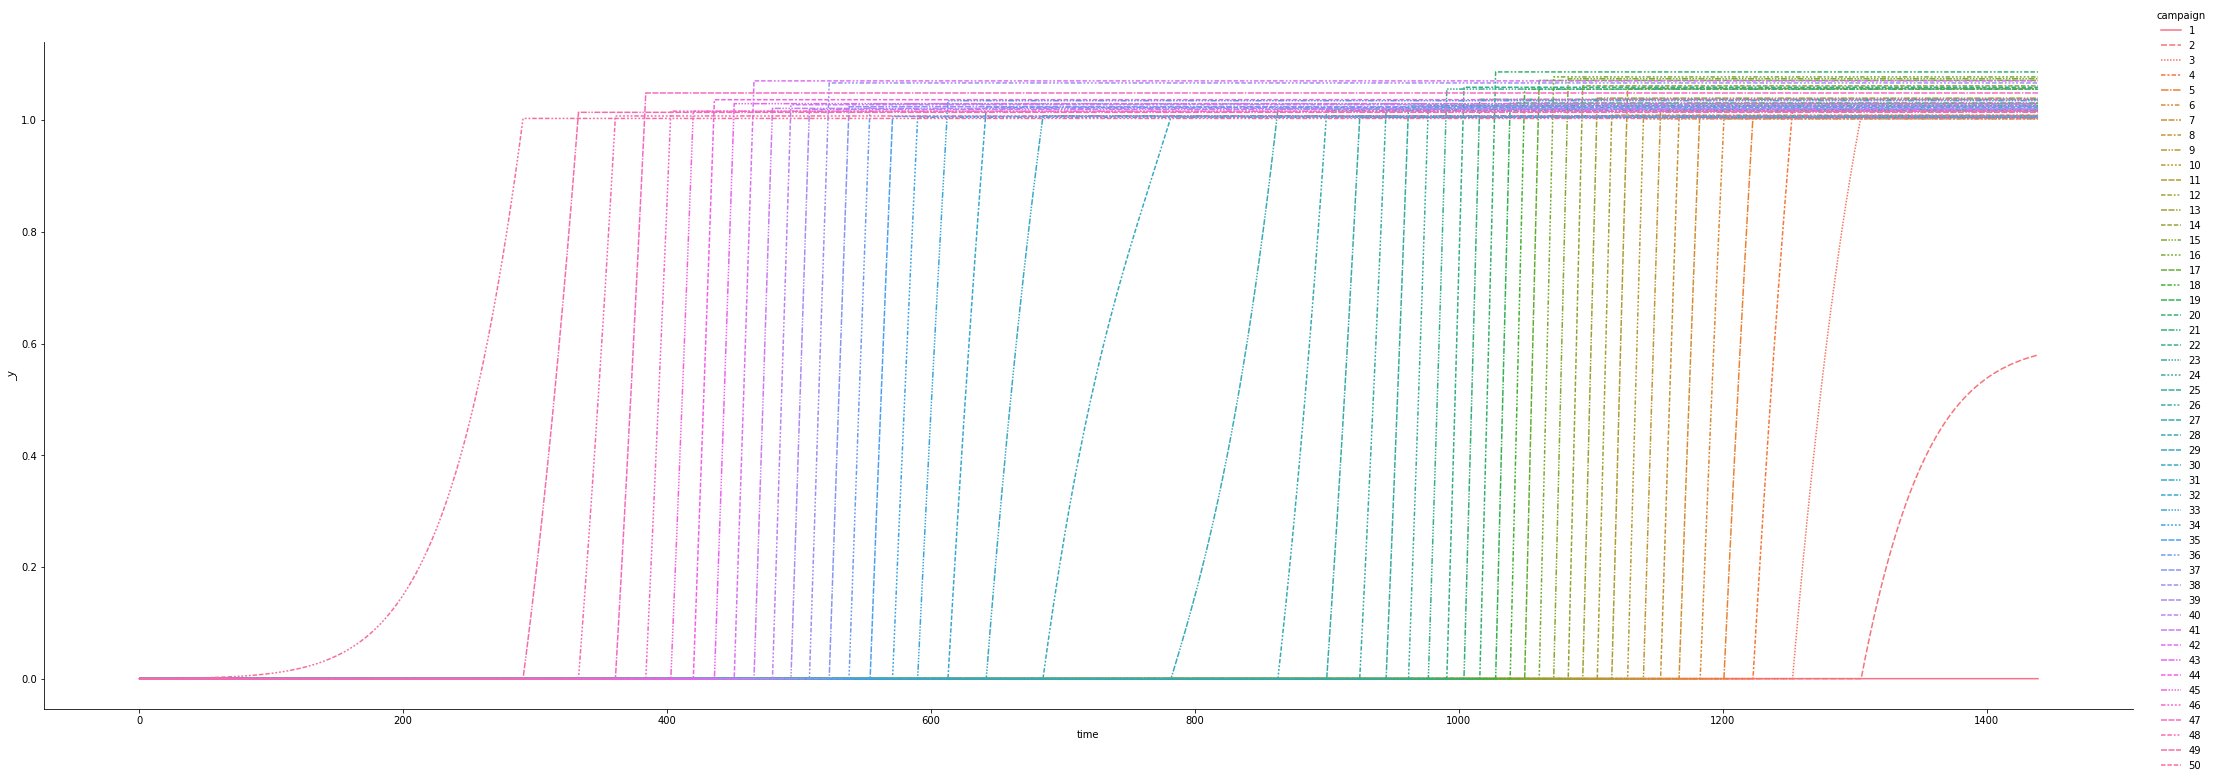

In [6]:
evs = configure_and_run(asap, traffic_dist, ticks)
analysis.analyse(evs, asap, ticks)
stats_asap = analysis.stats(evs)

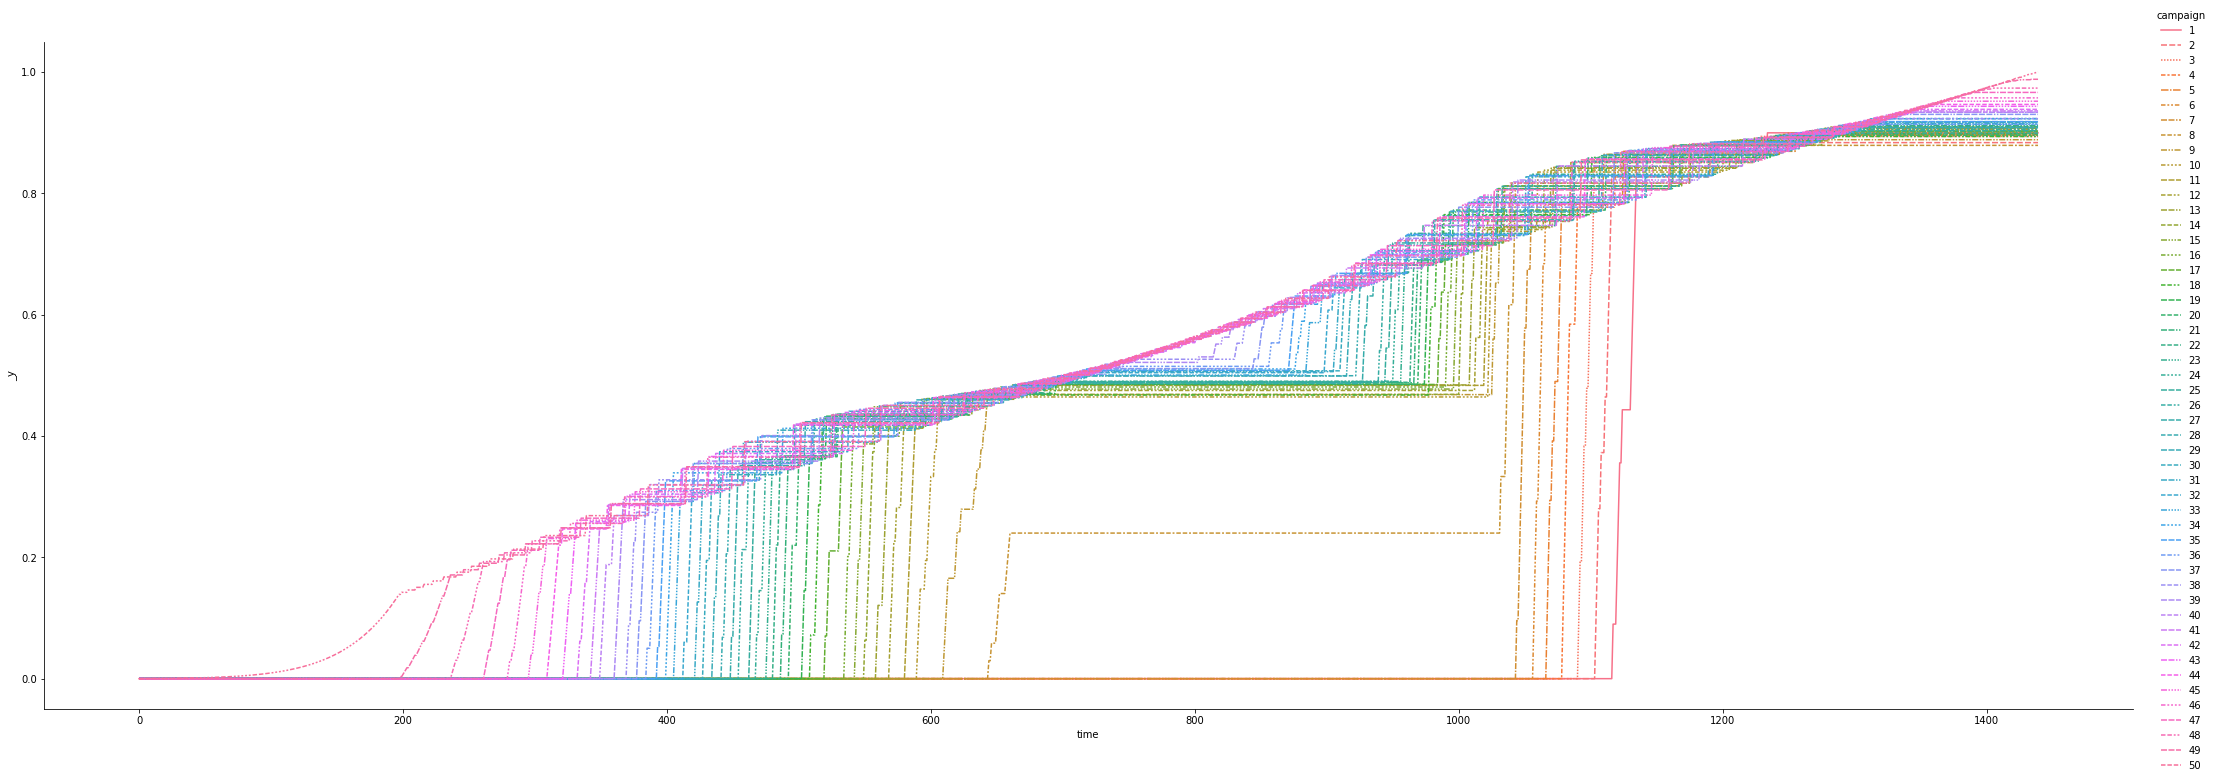

In [7]:
evs = configure_and_run(cumulative_equal, traffic_dist, ticks)
analysis.analyse(evs, cumulative_equal, ticks)
stats_cum_eq = analysis.stats(evs)

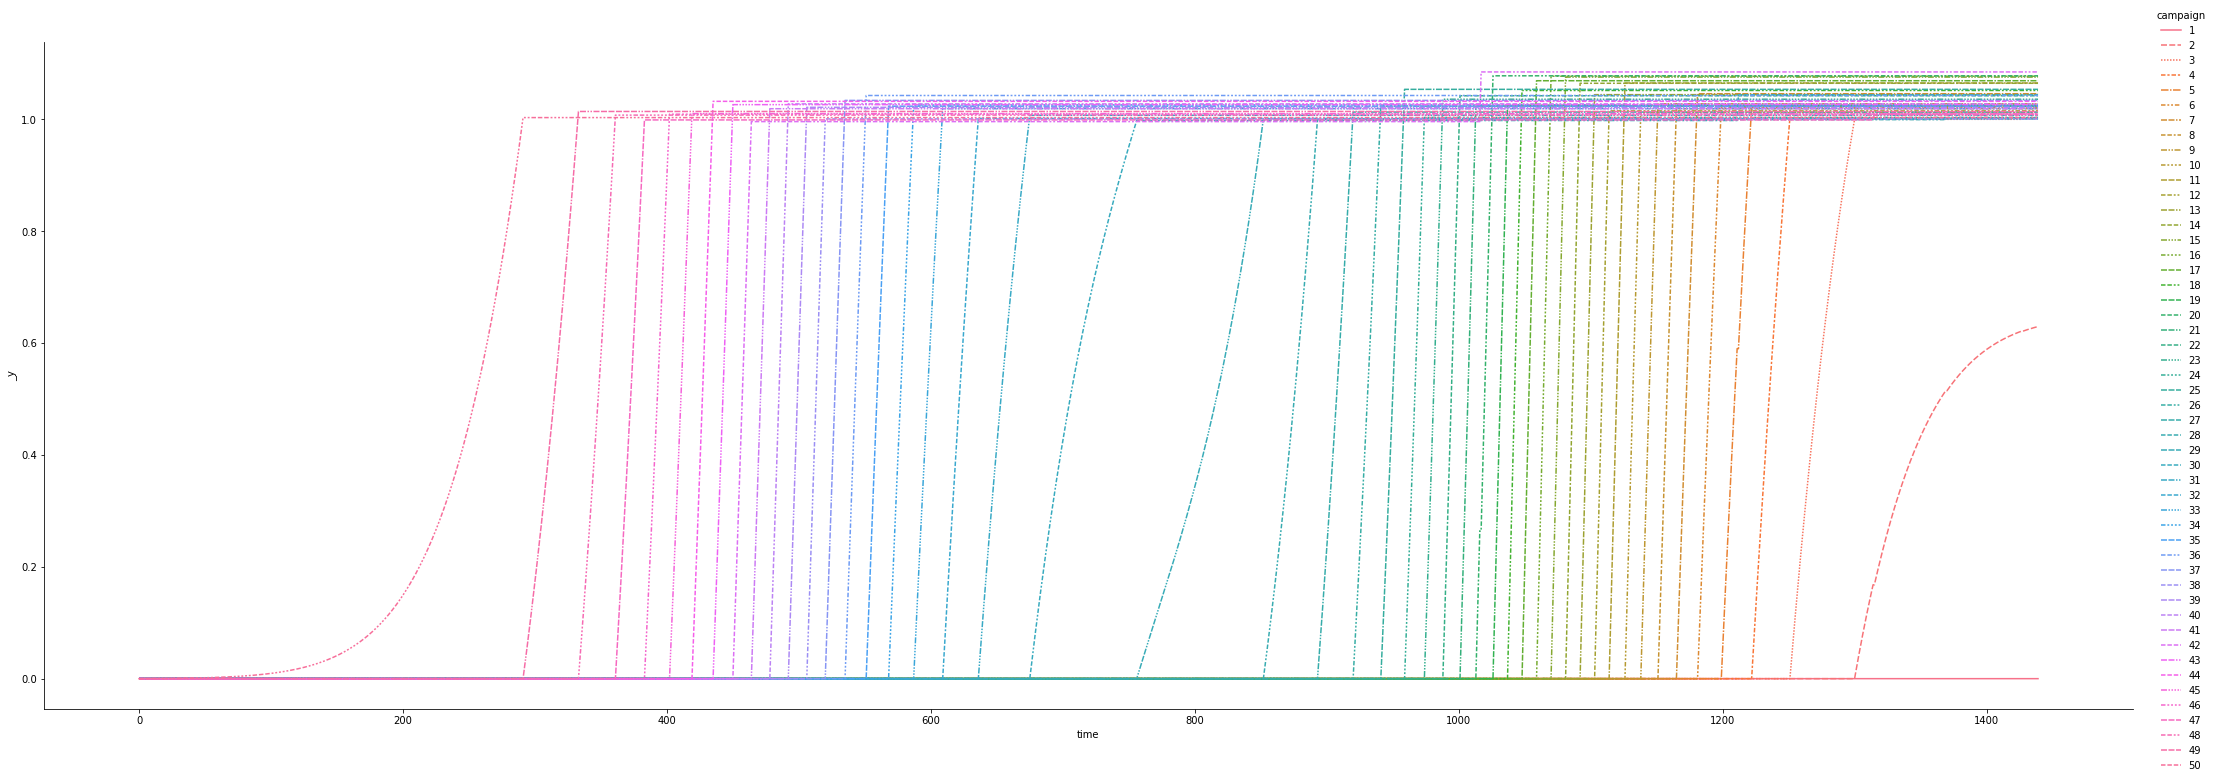

ZeroDivisionError: division by zero

In [29]:
evs = configure_and_run(recomputed_equal, traffic_dist, ticks)
analysis.analyse(evs, recomputed_equal, ticks)
stats_re_eq = analysis.stats(evs)

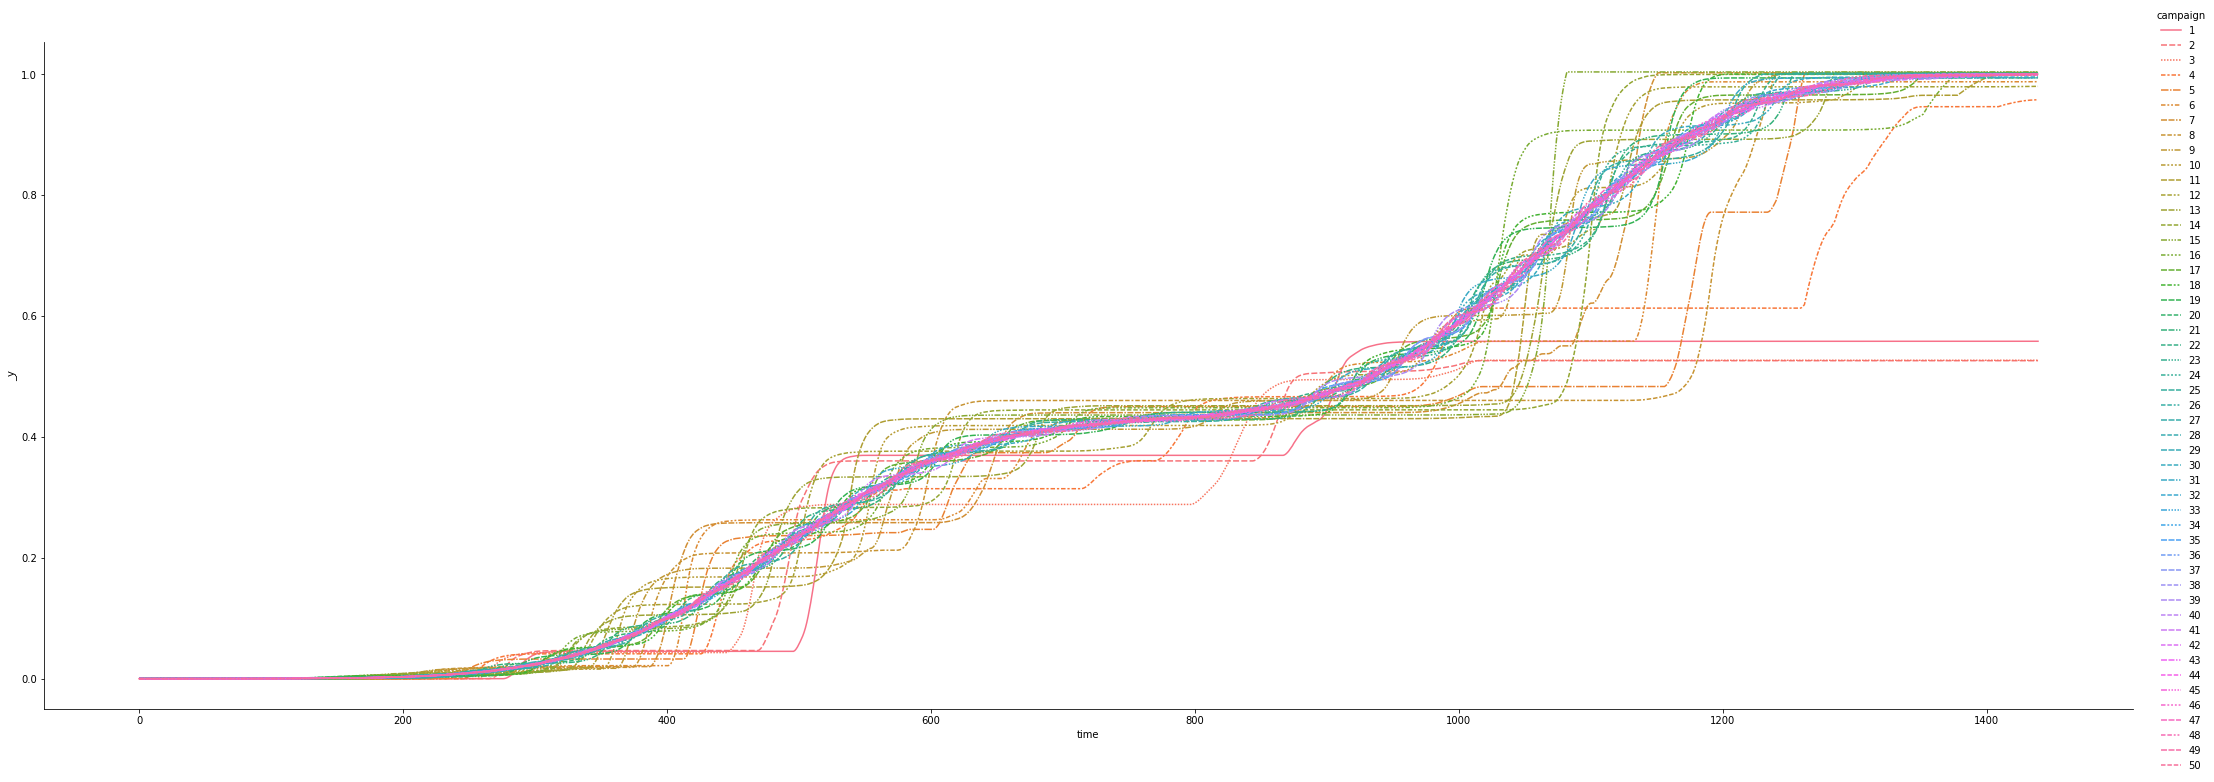

In [ ]:
evs = configure_and_run(linkedin, traffic_dist, ticks)
analysis.analyse(evs, linkedin, ticks)
stats_lin = analysis.stats(evs)

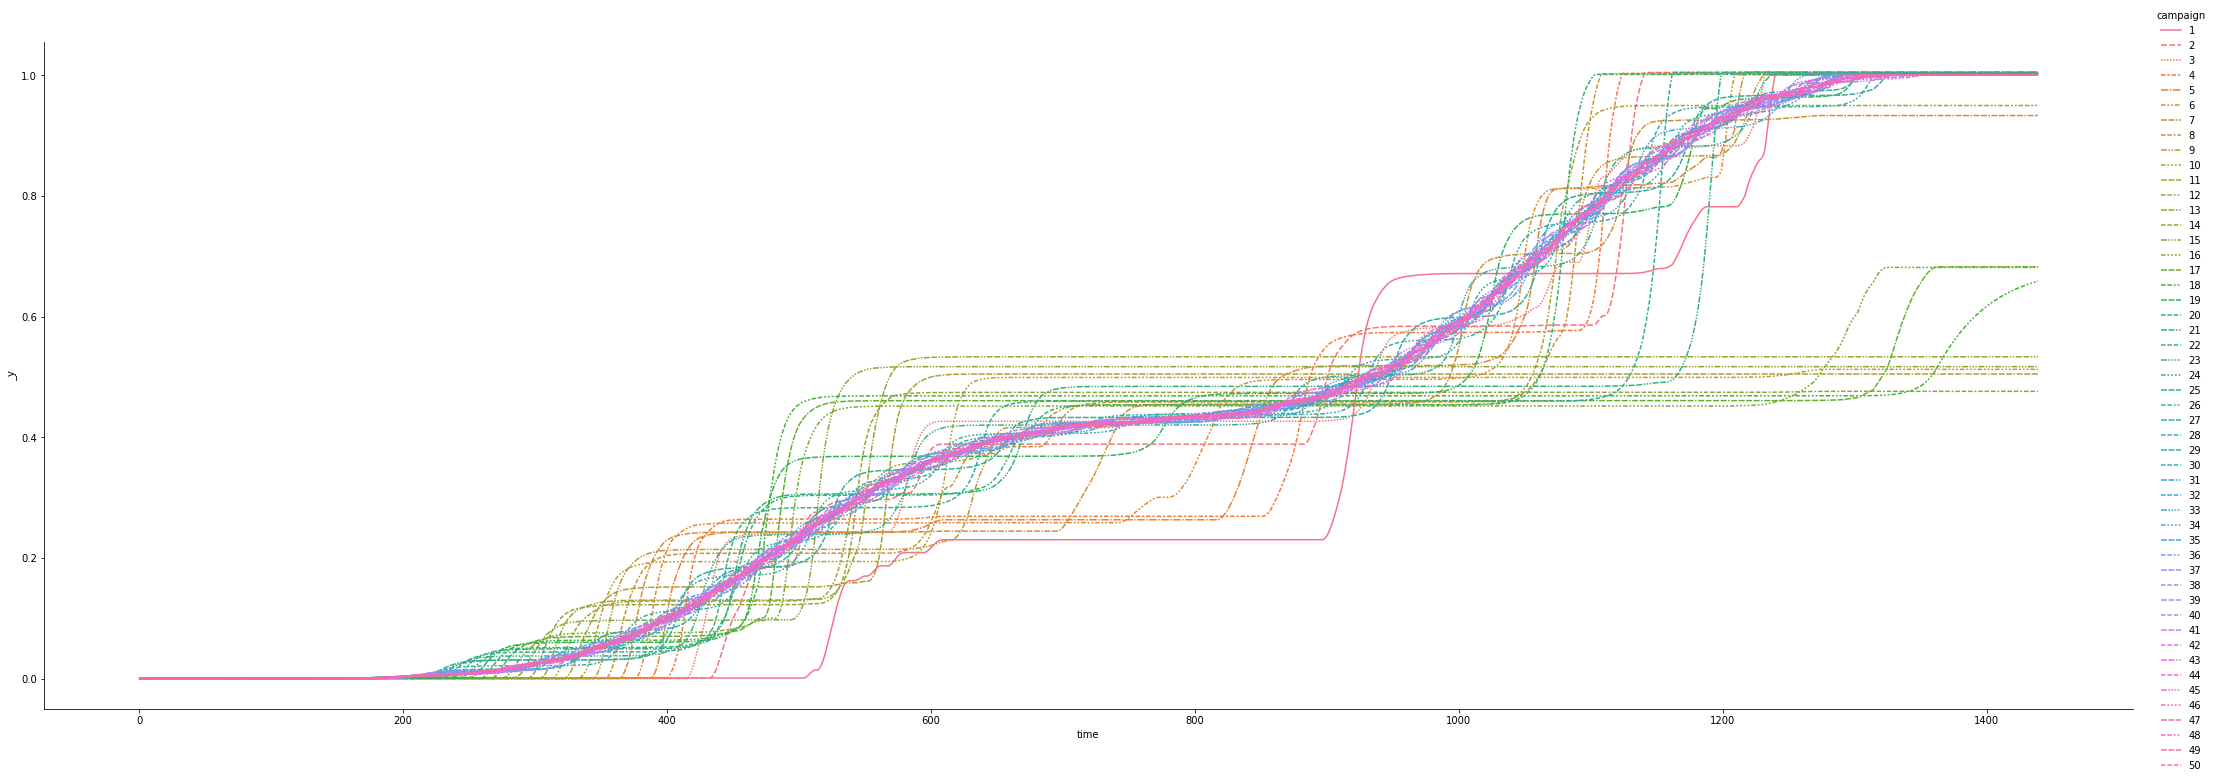

In [ ]:
evs = configure_and_run(linkedin_hot_end, traffic_dist, ticks)
analysis.analyse(evs, linkedin_hot_end, ticks)
stats_lin_he = analysis.stats(evs)

In [ ]:
ticks

1440

In [ ]:
len(traffic_dist)

1440

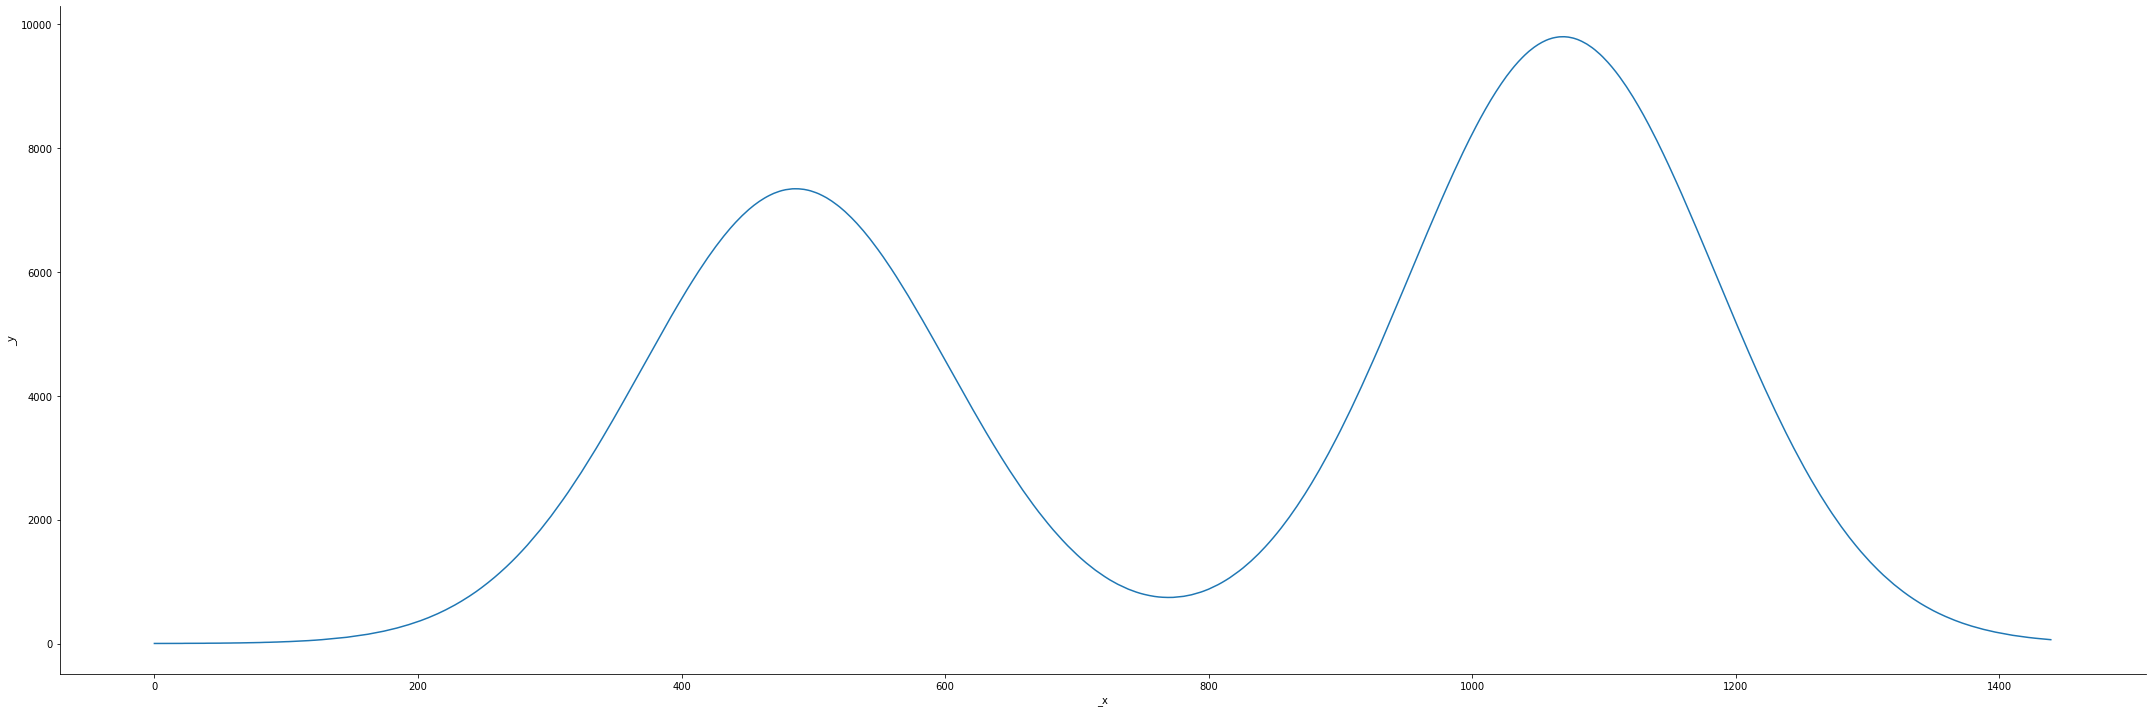

In [ ]:
from analysis import line_plot

line_plot(traffic_dist)

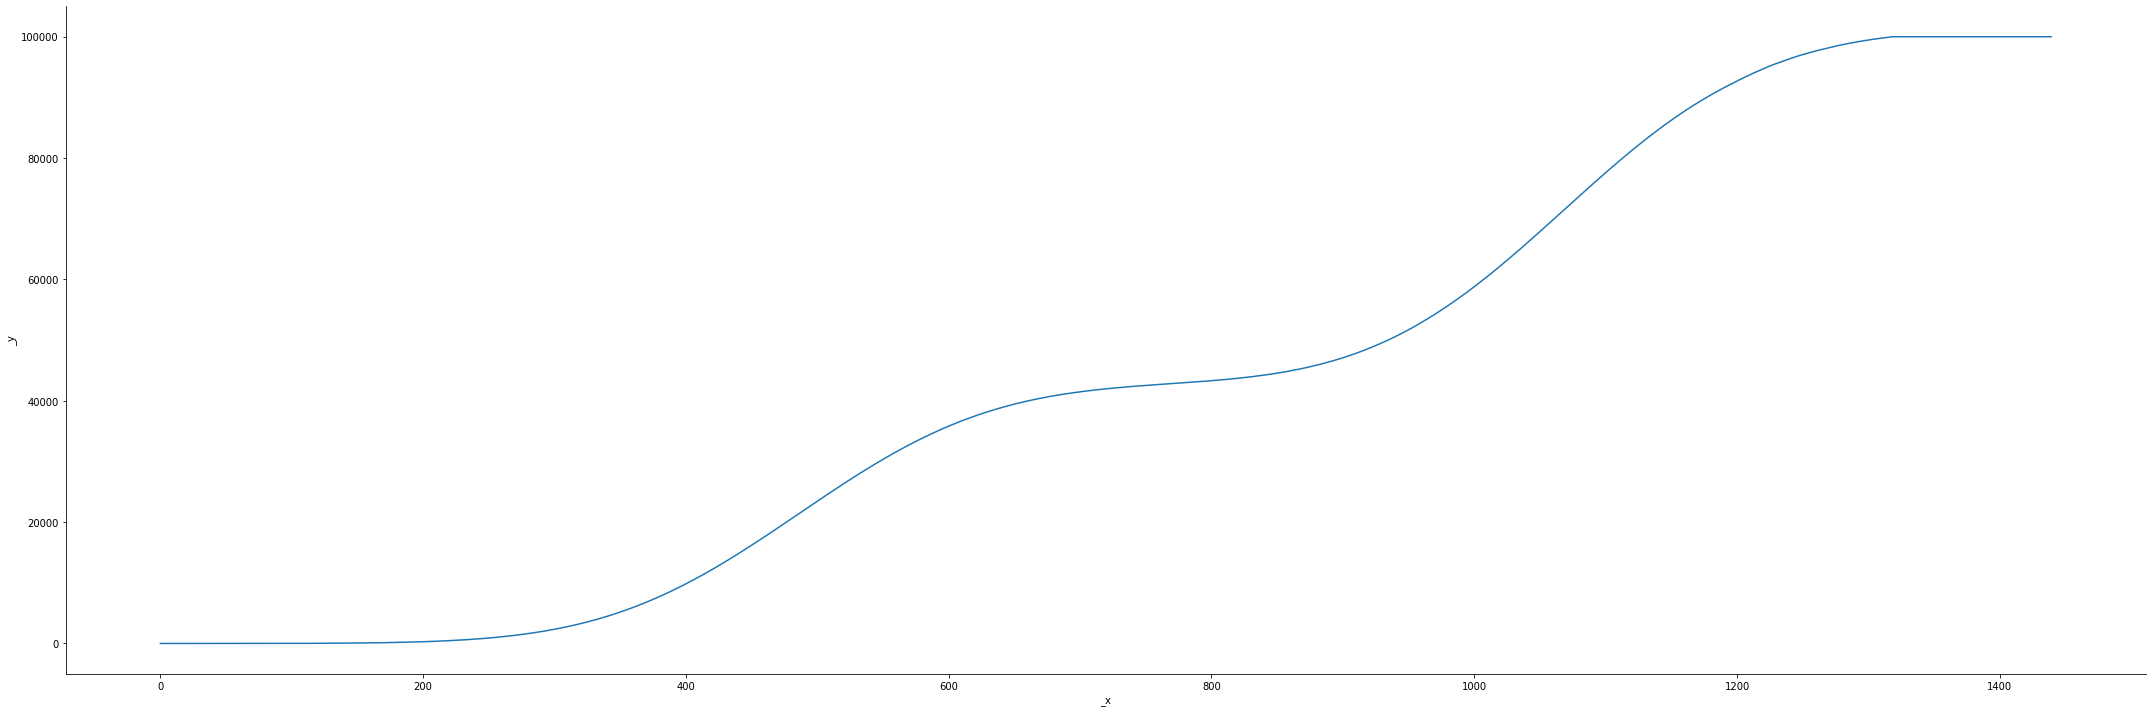

In [ ]:
line_plot(linkedin_hot_end[0].pacing.forecast)

In [ ]:
t_size_df = pd.DataFrame({
    "asap": stats_asap["t_size"],
    "cum_eq": stats_cum_eq["t_size"],
    "re_eq": stats_re_eq["t_size"],
    "lin": stats_lin["t_size"],
    "lin_he": stats_lin_he["t_size"],
})

In [ ]:
import numpy as np

t_size_df.agg([np.mean, np.median])

,asap,cum_eq,re_eq,lin,lin_he
mean,29.387755,779.64,81.326531,1242.72,1229.56
median,16.000000,808.50,16.000000,1332.00,1270.50


In [ ]:
t_uniq_df = pd.DataFrame({
    "asap": stats_asap["t_uniq"],
    "cum_eq": stats_cum_eq["t_uniq"],
    "re_eq": stats_re_eq["t_uniq"],
    "lin": stats_lin["t_uniq"],
    "lin_he": stats_lin_he["t_uniq"],
})
t_uniq_df.agg([np.mean, np.median])

,asap,cum_eq,re_eq,lin,lin_he
mean,29.387755,27.36,29.387755,991.44,812.18
median,16.000000,16.00,16.000000,1141.50,1001.50


In [ ]:
imps_df = pd.DataFrame({
    "asap": stats_asap["imps"],
    "cum_eq": stats_cum_eq["imps"],
    "re_eq": stats_re_eq["imps"],
    "lin": stats_lin["imps"],
    "lin_he": stats_lin_he["imps"],
})
imps_df.agg([np.mean, np.median])

,asap,cum_eq,re_eq,lin,lin_he
mean,102040.612245,91743.38,102040.612245,97059.8,92984.42
median,102269.000000,90891.50,102332.000000,100002.0,100021.50


In [ ]:
discr = imps_df - impressions_target

In [ ]:
discr.abs().agg([np.sum, np.mean, np.median, np.min, np.max])

,asap,cum_eq,re_eq,lin,lin_he
sum,184100.000000,412843.00,174110.000000,150838.00,359403.00
mean,3757.142857,8256.86,3553.265306,3016.76,7188.06
median,2392.000000,9108.50,2340.000000,52.00,69.00
amin,214.000000,6.00,59.000000,0.00,0.00
amax,42055.000000,12098.00,37060.000000,47400.00,52387.00


In [ ]:
under = discr.copy()

In [ ]:
under[under > 0] = 0

In [ ]:
under

,asap,cum_eq,re_eq,lin,lin_he
campaign,,,,,
1,NaN,-10031,NaN,-44190,0
2,-42055.0,-11644,-37060.0,-47400,0
3,0.0,-10625,0.0,-47337,0
4,0.0,-10281,0.0,-4236,0
5,0.0,-10099,0.0,0,0
6,0.0,-10393,0.0,-1253,0
7,0.0,-10421,0.0,0,-6685
8,0.0,-12098,0.0,0,0
9,0.0,-11167,0.0,0,0


In [ ]:
under.agg([np.sum, np.mean, np.median])

,asap,cum_eq,re_eq,lin,lin_he
sum,-42055.000000,-412837.00,-37060.000000,-148924.00,-355091.00
mean,-858.265306,-8256.74,-756.326531,-2978.48,-7101.82
median,0.000000,-9108.50,0.000000,0.00,0.00


In [ ]:
over = discr.copy()

In [ ]:
over[over < 0] = 0

In [ ]:
over

,asap,cum_eq,re_eq,lin,lin_he
campaign,,,,,
1,NaN,0,NaN,0,253
2,0.0,0,0.0,0,443
3,819.0,0,72.0,0,134
4,1835.0,0,270.0,0,308
5,644.0,0,2304.0,7,536
6,250.0,0,2079.0,0,90
7,2944.0,0,4561.0,222,0
8,527.0,0,1881.0,155,230
9,1590.0,0,2754.0,10,69


In [ ]:
over.agg([np.sum, np.mean, np.median])

,asap,cum_eq,re_eq,lin,lin_he
sum,142045.000000,6.00,137050.000000,1914.00,4312.00
mean,2898.877551,0.12,2796.938776,38.28,86.24
median,2269.000000,0.00,2332.000000,2.00,21.50
